In [78]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn

In [95]:
titanic = pd.read_csv('titanic.csv').dropna()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


Text(0.5, 1.0, 'Ratio of Male to Female Passengers')

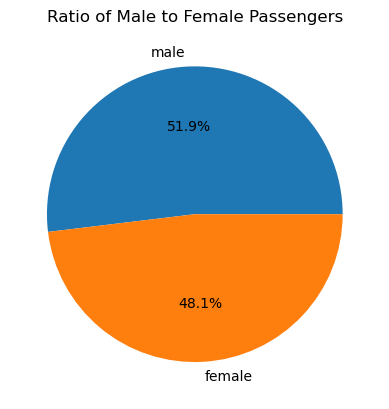

In [15]:
# Create a pie chart to show the ratio of male to female passengers.
plt.pie(titanic['Sex'].value_counts(), autopct='%1.1f%%', labels=titanic['Sex'].value_counts().index)
plt.legend=True
plt.title('Ratio of Male to Female Passengers')

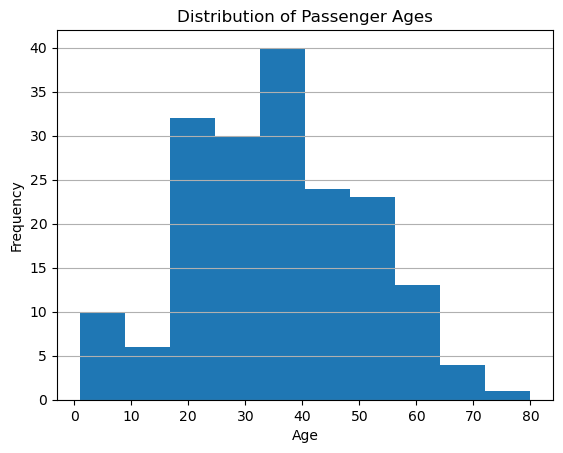

In [20]:
# Create a histogram to show the distribution of passenger ages.
plt.hist( titanic['Age'])
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')

([<matplotlib.axis.XTick at 0x21d02930c90>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

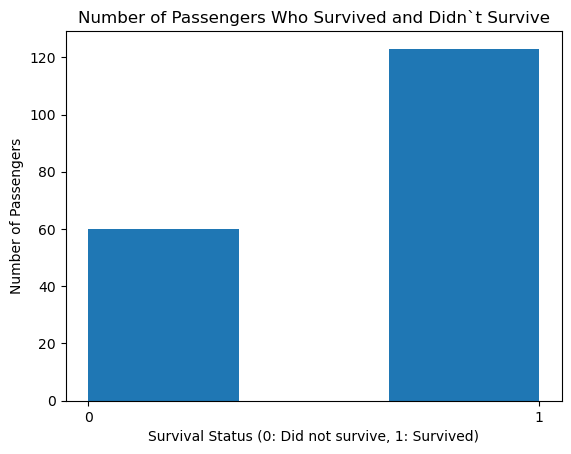

In [67]:
# Create a bar plot to show the number of passengers who survived and didn’t survive.
# survival_counts = titanic['Survived'].value_counts()

plt.hist(titanic['Survived'], bins= 3)
plt.bar_width = 2
plt.title('Number of Passengers Who Survived and Didn`t Survive')
plt.xlabel('Survival Status (0: Did not survive, 1: Survived)')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1], rotation=0)

Text(0, 0.5, 'Number of Passengers')

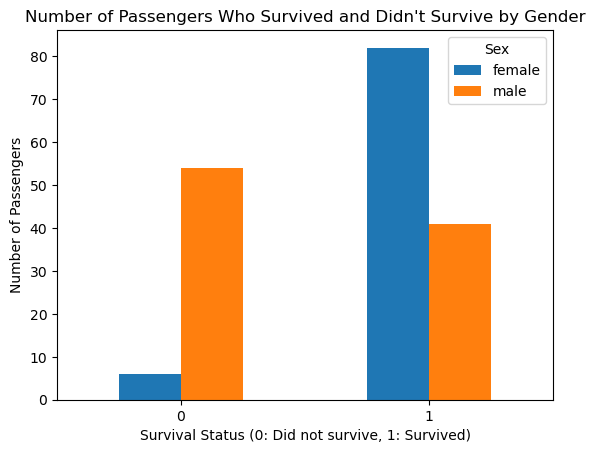

In [69]:
# Create a stacked bar plot to show the number of passengers who survived and didn’t survive, split by gender.
survival_gender_counts = titanic.groupby(['Survived', 'Sex']).size().unstack()
survival_gender_counts.plot(kind='bar', rot=0,)
plt.title('Number of Passengers Who Survived and Didn\'t Survive by Gender')
plt.xlabel('Survival Status (0: Did not survive, 1: Survived)')
plt.ylabel('Number of Passengers')

Text(0, 0.5, 'Fare')

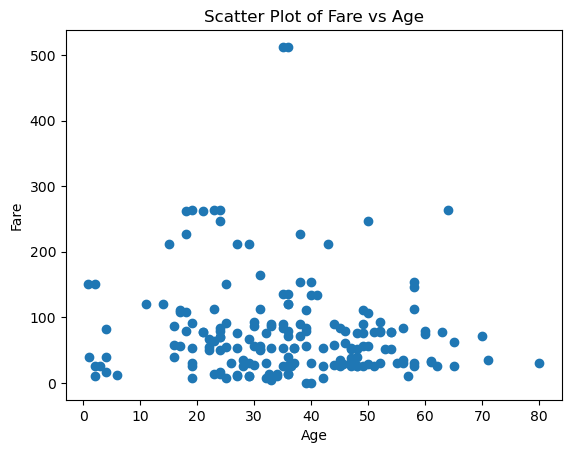

In [72]:
# Create a scatter plot to show the correlation between fare and age.
plt.scatter(titanic['Age'], titanic['Fare'])
plt.title('Scatter Plot of Fare vs Age')
plt.xlabel('Age')
plt.ylabel('Fare')


In [76]:
# Handle missing values in the ‘Age’ column by replacing them with the mean or median age.
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [84]:
# Normalize the ‘Fare’ column using a suitable method.
titanic['Fare'] = (titanic['Fare'] - titanic['Fare'].min()) / (titanic['Fare'].max() - titanic['Fare'].min())
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.139136,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.103644,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,0.101229,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,0.032596,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,0.051822,C103,S


In [96]:
# Convert the ‘Sex’ column into numerical representation using one-hot encoding.
titanic = pd.get_dummies(titanic, columns=['Sex'], prefix=['Sex'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,True,False
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,False,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,S,True,False
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,S,True,False


In [92]:
#  Use pandas and numpy to analyze the data. Here are some specific tasks:
# Calculate the survival rate for different genders.
titanic.loc[titanic['Sex_male'] == 1, 'Survived'].mean()

0.43157894736842106

In [93]:
titanic.loc[titanic['Sex_female'] == 1, 'Survived'].mean()

0.9318181818181818

In [98]:
# Calculate the survival rate for different passenger classes.
titanic.groupby('Pclass')['Survived'].mean()

Pclass
1    0.670886
2    0.800000
3    0.500000
Name: Survived, dtype: float64

In [100]:
# Identify the passenger with the highest fare.
titanic.loc[titanic['Fare'].idxmax(), 'PassengerId']

680